<a href="https://colab.research.google.com/github/Am1rTl/Info/blob/main/CU_GK_Week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт данных


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier

In [106]:
import lightgbm as lgb
from catboost import CatBoostClassifier

In [107]:
df = pd.read_pickle('train_dataset_normalized.pkl')

In [108]:
df.shape

(548, 19)

In [109]:
df.head()
# видим, что данные уже нормализованны ( как можно догадаться из названия датасета )

,Прогрессия,Число очагов,Объем очагов,Число РХ процедур,Индекс Карновского,ОВГМ,Операция,Возраст,Время метастазирования,Время реагирования,КРР,Меланома,НМРЛ,РМЖ,РП,Таргетная терапия,Химиотерапия,Без лечения,Мужчина
0,1,0.095238,0.008543,0.0,0.666667,0,0,0.490909,0.076249,0.165963,0,1,0,0,0,0,1,0,1
1,1,0.095238,0.101619,0.0,0.666667,0,0,0.690909,0.034228,-0.004219,0,0,0,0,1,0,0,0,1
2,0,0.476190,0.178732,0.0,0.666667,0,0,0.454545,0.203423,0.018284,1,0,0,0,0,0,1,0,0
3,1,0.285714,0.062950,0.2,0.666667,0,0,0.472727,0.068179,0.030942,0,0,0,1,0,1,0,0,0
4,1,0.476190,0.127023,0.8,0.666667,0,0,0.472727,0.012801,0.014065,0,0,0,0,1,1,0,0,0


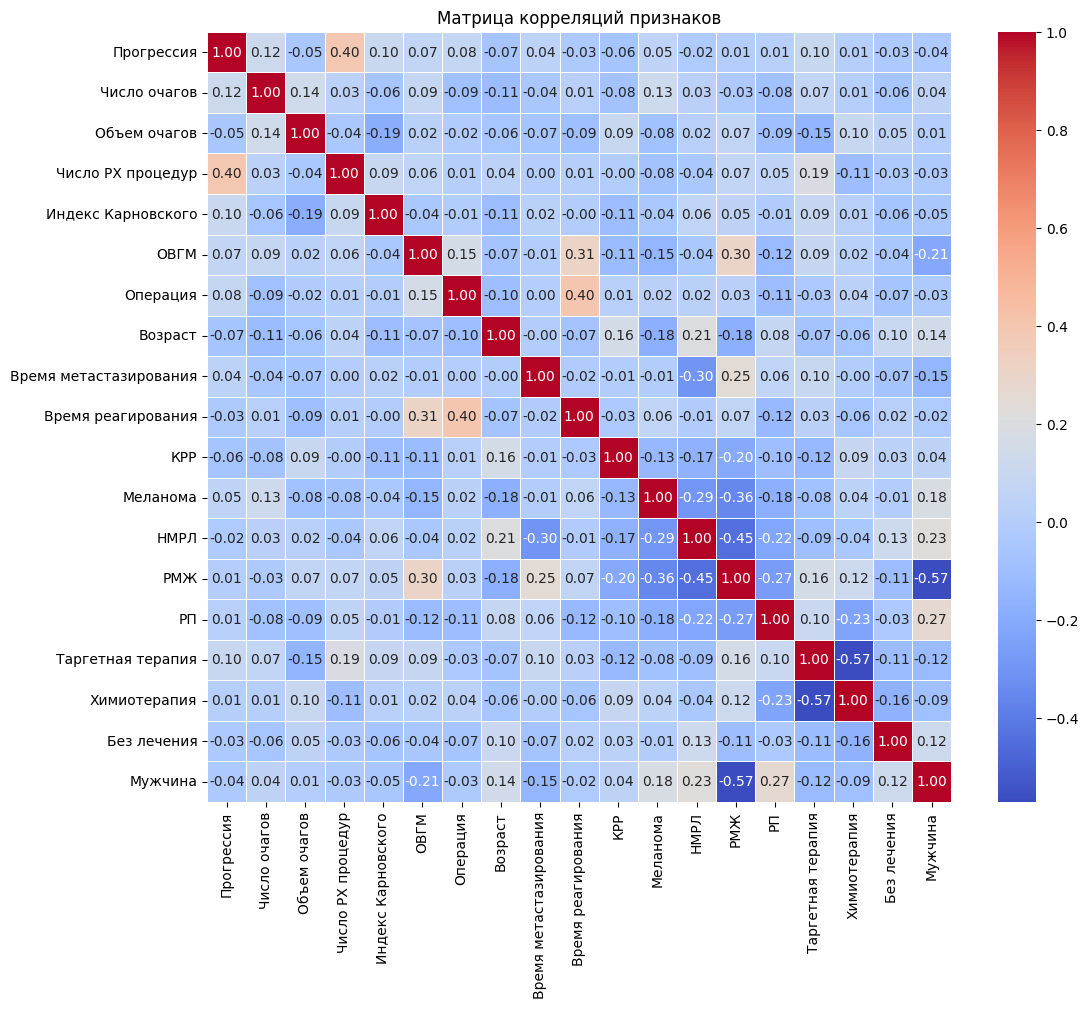

In [110]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Матрица корреляций признаков")
plt.show()

In [111]:
target_col = 'Прогрессия'

In [112]:
X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

Обучающая выборка: (438, 18)
Тестовая выборка: (110, 18)


# Logistic Regression

In [113]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [114]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [115]:
y_pred = log_reg.predict(X_test)

In [116]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

In [117]:
results.append({"Модель": "Logistic Regression", "Accuracy": acc, "F1 Score": f1})
print(f" Logistic Regression accuracy: {acc:.4f}, F1: {f1:.4f}")

 Logistic Regression accuracy: 0.6000, F1: 0.5624


# Decision Tree


In [118]:
dt_clf = DecisionTreeClassifier(random_state=42)

In [119]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [120]:
y_pred = dt_clf.predict(X_test)

In [121]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

In [122]:
results.append({"Модель": "Decision Tree", "Accuracy": acc, "F1 Score": f1})
print(f"Decision Tree accuracy: {acc:.4f}, F1: {f1:.4f}")

Decision Tree accuracy: 0.6364, F1: 0.6336


# SVM

In [123]:
svm_clf = SVC(random_state=42)

In [124]:
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

In [125]:
y_pred = svm_clf.predict(X_test)

In [126]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

In [127]:
results.append({"Модель": "SVM", "Accuracy": acc, "F1 Score": f1})
print(f"SVM accuracy: {acc:.4f}, F1: {f1:.4f}")

SVM accuracy: 0.6182, F1: 0.5752


# KNN


In [128]:
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [129]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [130]:
y_pred = knn_clf.predict(X_test)

In [131]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

In [132]:
results.append({"Модель": "KNN", "Accuracy": acc, "F1 Score": f1})
print(f"KNN accuracy: {acc:.4f}, F1: {f1:.4f}")

KNN accuracy: 0.5818, F1: 0.5870


# Bagging

In [133]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [134]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [135]:
y_pred = rf_clf.predict(X_test)

In [136]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

In [137]:
results.append({"Модель": "Random Forest", "Accuracy": acc, "F1 Score": f1})
print(f"Random Forest accuracy: {acc:.4f}, F1: {f1:.4f}")

Random Forest accuracy: 0.6364, F1: 0.6409


# Boosting


In [138]:
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)

In [139]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [140]:
y_pred = ada_clf.predict(X_test)

In [141]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

In [142]:
results.append({"Модель": "AdaBoost", "Accuracy": acc, "F1 Score": f1})
print(f"AdaBoost accuracy: {acc:.4f}, F1: {f1:.4f}")

AdaBoost accuracy: 0.6727, F1: 0.6727


# LightGBM

In [143]:
lgb_clf = lgb.LGBMClassifier(random_state=42, verbose=-1)

In [144]:
lgb_clf.fit(X_train, y_train)

LGBMClassifier(random_state=42, verbose=-1)

In [145]:
y_pred = lgb_clf.predict(X_test)

In [146]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

In [147]:
results.append({"Модель": "LightGBM", "Accuracy": acc, "F1 Score": f1})
print(f"LightGBM accuracy: {acc:.4f}, F1: {f1:.4f}")

LightGBM accuracy: 0.6909, F1: 0.6948


# CatBoost

In [148]:
cat_clf = CatBoostClassifier(verbose=0, random_state=42)

In [149]:
cat_clf.fit(X_train, y_train)

In [150]:
y_pred = cat_clf.predict(X_test)

In [151]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

In [152]:
results.append({"Модель": "CatBoost", "Accuracy": acc, "F1 Score": f1})
print(f"CatBoost accuracy: {acc:.4f}, F1: {f1:.4f}")

CatBoost accuracy: 0.6545, F1: 0.6640


# MLP Classifier

In [153]:
mlp_clf = MLPClassifier(max_iter=1000, random_state=42)

In [154]:
mlp_clf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=1000, random_state=42)

In [155]:
y_pred = mlp_clf.predict(X_test)

In [156]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

In [157]:
results.append({"Модель": "MLP Classifier", "Accuracy": acc, "F1 Score": f1})
print(f"MLP Classifier accuracy: {acc:.4f}, F1: {f1:.4f}")

MLP Classifier accuracy: 0.6364, F1: 0.6427


# Stacking

In [158]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('svr', SVC(kernel='rbf', probability=True, random_state=42))
]

In [159]:
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

In [160]:
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=42)),
                               ('svr', SVC(probability=True, random_state=42))],
                   final_estimator=LogisticRegression())

In [161]:
y_pred = stacking_clf.predict(X_test)

In [162]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

In [163]:
results.append({"Модель": "Stacking", "Accuracy": acc, "F1 Score": f1})
print(f"Stacking accuracy: {acc:.4f}, F1: {f1:.4f}")

Stacking accuracy: 0.6091, F1: 0.6104


# Сравниваем результаты

In [164]:
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)

In [165]:
display(results_df)

,Модель,Accuracy,F1 Score
6,LightGBM,0.690909,0.694750
23,LightGBM,0.690909,0.694750
33,LightGBM,0.690909,0.694750
5,AdaBoost,0.672727,0.672727
22,AdaBoost,0.672727,0.672727
32,AdaBoost,0.672727,0.672727
34,CatBoost,0.654545,0.663980
7,CatBoost,0.654545,0.663980
24,CatBoost,0.654545,0.663980
25,MLP Classifier,0.636364,0.642667


/tmp/ipython-input-2528381526.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F1 Score", y="Модель", data=results_df, palette="viridis")


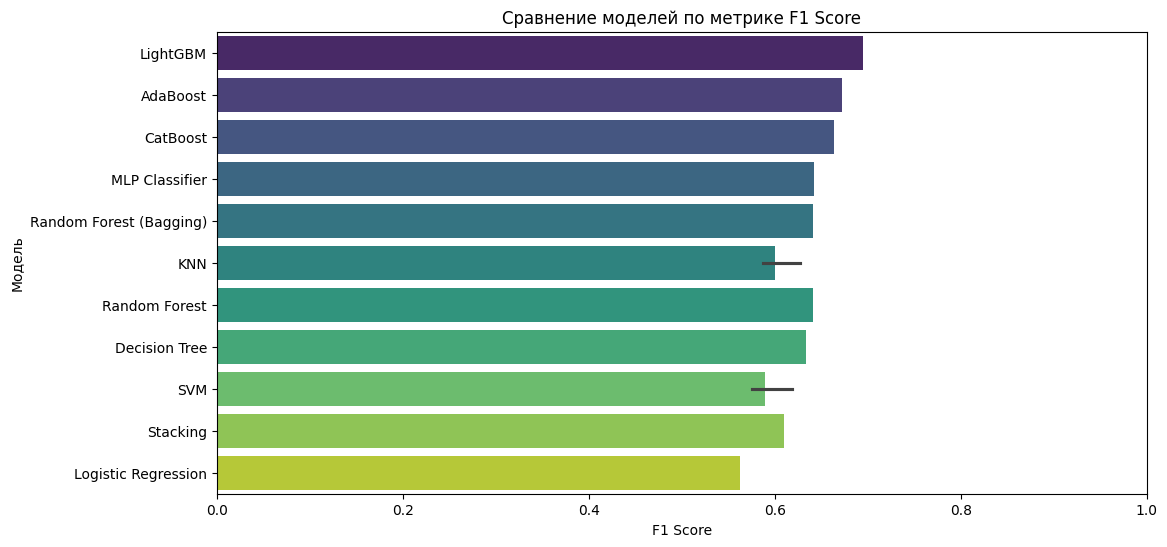

In [166]:

plt.figure(figsize=(12, 6))
sns.barplot(x="F1 Score", y="Модель", data=results_df, palette="viridis")
plt.title("Сравнение моделей по метрике F1 Score")
plt.xlim(0, 1.0)
plt.show()